<a href="https://colab.research.google.com/github/shikhar2402/MACHINE-LEARNING-FOR-BEGINNERS/blob/master/%23deeplearning%40tensorflow%23identifyingdigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:

import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=10)# train the model


Epoch 1/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2583 - acc: 0.9252
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1045 - acc: 0.9675
Epoch 3/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0705 - acc: 0.9780
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0513 - acc: 0.9839
Epoch 5/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0408 - acc: 0.9869
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0310 - acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0243 - acc: 0.9915
Epoch 8/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0207 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0183 - acc: 0.9936
Epoch 10/10
60000/60000 [==============================] - 4s 74us/sample - loss: 

In [18]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  
print(y_train[2])

10000/10000 [==============================] - 0s 35us/sample - loss: 0.1278 - acc: 0.9726
0.1277587116169445
0.9726
4


In [12]:
model.save('epic_num_reader.model')


new_model = tf.keras.models.load_model('epic_num_reader.model')

predictions = new_model.predict(x_test)
print(predictions)

W0615 21:15:02.876938 139647391098752 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


[[3.16764437e-14 6.15002754e-12 5.52047019e-11 ... 9.99999166e-01
  9.96852882e-13 1.22170815e-11]
 [1.55657628e-18 1.10096325e-05 9.99989033e-01 ... 3.91732477e-14
  2.66549738e-12 1.51566872e-21]
 [7.94392763e-13 1.00000000e+00 3.14312243e-10 ... 3.77552922e-08
  2.26710171e-08 2.46636739e-11]
 ...
 [3.92355835e-18 8.08041856e-10 3.48229459e-16 ... 1.81294063e-10
  3.87233232e-11 2.22868692e-07]
 [1.88075944e-12 3.23022276e-10 3.85265279e-13 ... 4.28987779e-09
  1.12276815e-04 2.99318521e-16]
 [1.01791076e-10 1.38223072e-10 1.31119074e-10 ... 1.47994916e-19
  2.91674150e-11 4.70311859e-14]]


7


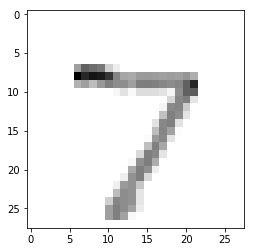

In [15]:
import numpy as np

print(np.argmax(predictions[0]))
import matplotlib.pyplot as plt

plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()